In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math
import warnings
import scipy.stats
import random

In [2]:
df_pre = pd.read_csv('df_pre.csv')
df_post = pd.read_csv('df_post.csv')

In [64]:
legacy = pd.read_csv('df_post_legacy.csv')
eip1559 = pd.read_csv('df_post_eip1559.csv')

In [34]:
inp = df_pre['variance']
Q1 = inp.quantile(0.25)
Q3 = inp.quantile(0.75)
IQR = Q3 - Q1

new_df_pre = df_pre[(df_pre['variance'] < (Q1 - 1.5 * IQR)) |(df_pre['variance'] > (Q3 + 1.5 * IQR))]
array = np.histogram_bin_edges(new_df_pre['variance'], bins = 'fd')
array

array([1.66468587e+03, 3.82712965e+03, 5.98957342e+03, ...,
       5.34097010e+07, 5.34118634e+07, 5.34140258e+07])

In [57]:
df_pre['variance_category'] = pd.cut(df_pre['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)

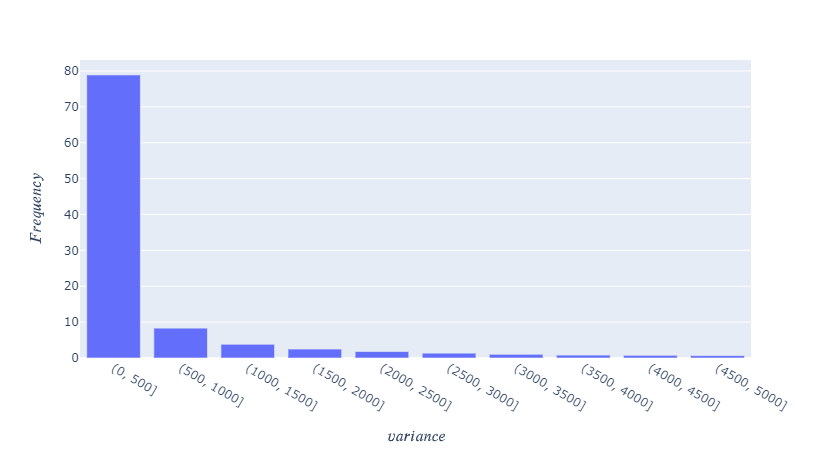

In [59]:
block_freq = df_pre[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

In [62]:
df_post['variance_category'] = pd.cut(df_post['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)

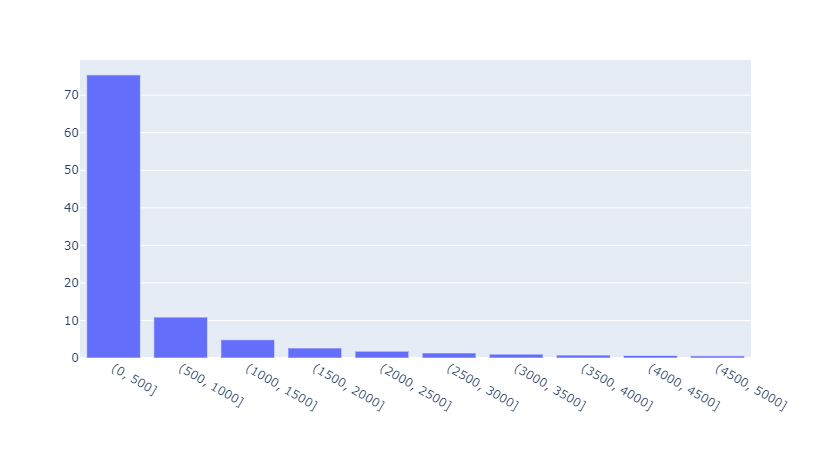

In [63]:
block_freq = df_post[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

In [68]:
legacy['variance_category'] = pd.cut(legacy['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)
eip1559['variance_category'] = pd.cut(eip1559['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)

## Legacy

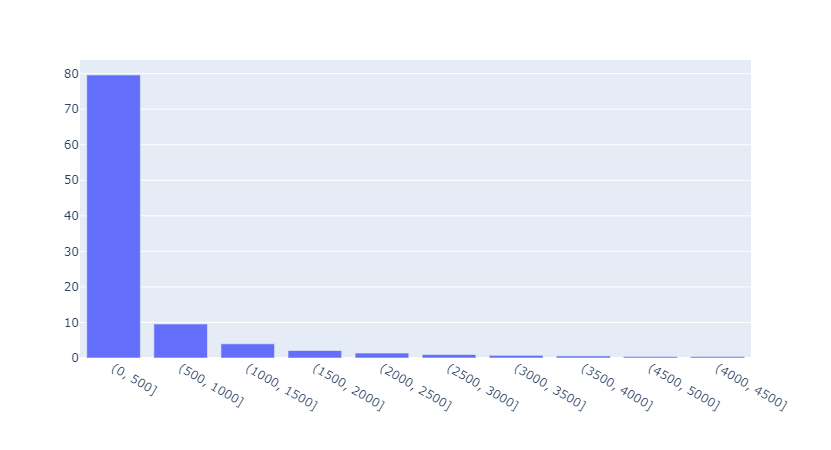

In [69]:
block_freq = legacy[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

## EIP1559

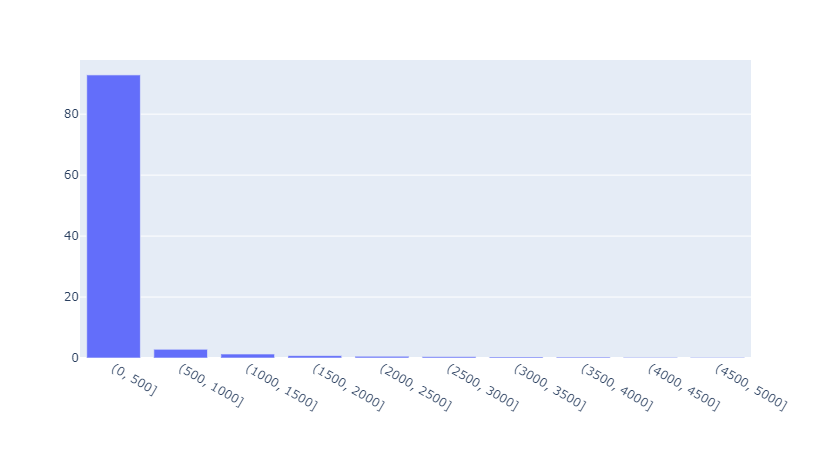

In [70]:
block_freq = eip1559[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

## Bursty vs Stable

In [81]:
burst_blocks = pd.read_csv('avg_basefee_burst.csv').iloc[:,0]
burst_blocks = list(set(burst_blocks))
burst_blocks = list(map(int,burst_blocks))

### Pre

In [85]:
lst = []
for i in range(len(df_pre)):
    if int(df_pre['blk no.'][i]) in burst_blocks:
        lst.append(1)
    else:
        lst.append(0)
        
df_pre['is bursty'] = lst

In [87]:
df_pre_bursty = df_pre[df_pre['is bursty'] == 1]
df_pre_stable = df_pre[df_pre['is bursty'] != 1]

#### Bursty

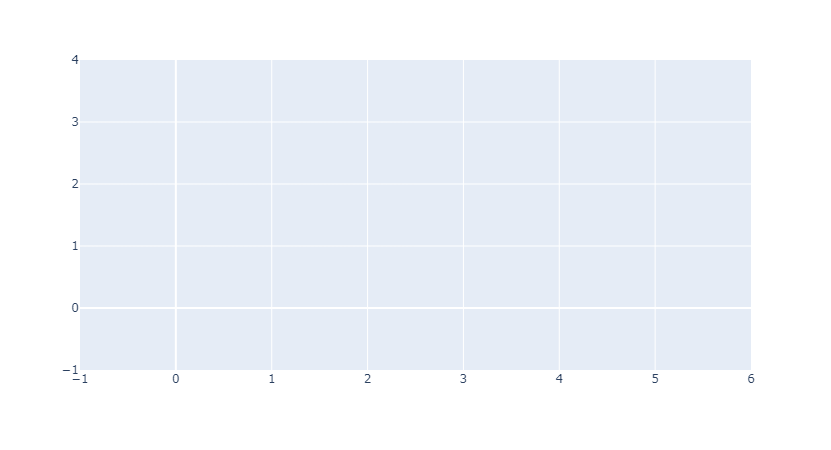

In [88]:
block_freq = df_pre_bursty[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

#### Stable

### Post

In [100]:
lst = []
for i in range(len(df_post)):
    if int(df_post['blk no.'][i]) in burst_blocks:
        lst.append(1)
    else:
        lst.append(0)
        
df_post['is bursty'] = lst

In [112]:
df_post_bursty = df_post[df_post['is bursty'] == 1]
df_post_stable = df_post[df_post['is bursty'] != 1]

#### Bursty

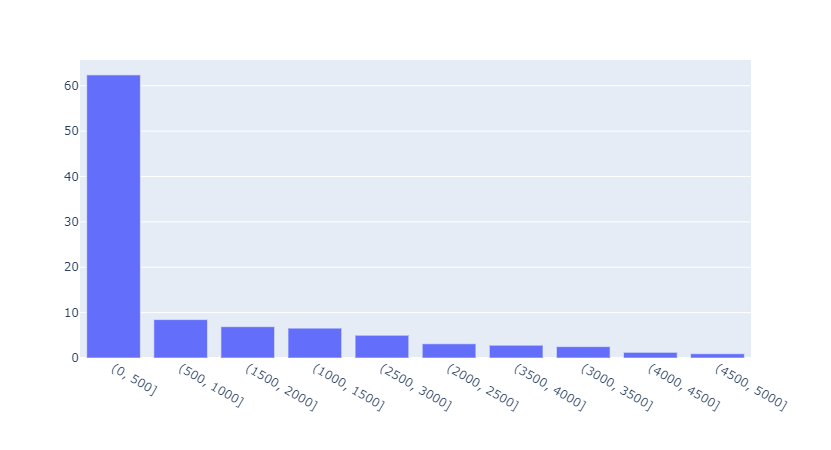

In [113]:
block_freq = df_post_bursty[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

#### Stable

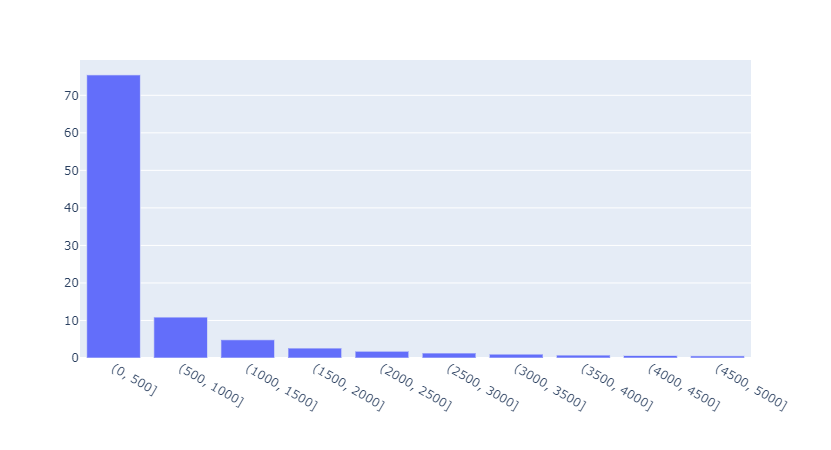

In [114]:
block_freq = df_post_stable[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)